In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import *
from matplotlib import cm
# e es la carga elemental, m_p es la masa del proton
from scipy.constants import e, m_p

In [2]:
num_particulas = int(input('Escriba el numero de partículas que desea simular:\n'))
max_vel = float(input('Escriba la velocidad máxima que una partícula puede tener:\n'))
magnitud_B = float(input('Escriba la magnitud del campo magnético:\n'))
theta0 = float(input('Escriba el ángulo de incidencia de la partícula (theta0) en grados:\nNOTA:theta0 debe ser mayor a 0\n'))

Escriba el numero de partículas que desea simular:
5
Escriba la velocidad máxima que una partícula puede tener:
10
Escriba la magnitud del campo magnético:
50
Escriba el ángulo de incidencia de la partícula (theta0) en grados:
NOTA:theta0 debe ser mayor a 0
50


### Condiciones iniciales

In [3]:
t = 0.0
trayectoria = np.array([[0.0, 0.0, 0.0]])
aceleracion = np.array([[0.0, 0.0, 0.0]])
velocidad = np.array([[0.0, 2.0, 0.0]])

In [4]:
t_m = 0.0
trayectoria_m = np.array([[0.0, 0.0, 0.0]])
aceleracion_m = np.array([[0.0, 0.0, 0.0]])
velocidad_m = np.array([[0.0, 2.0, 0.0]])

In [5]:
def fuerza_y_aceleracion(q, v, B, m):
    # Fuerza magnetica
    F = q*np.cross(v, B)
    a = F/m
    return F, a

In [6]:
def mover_particula(dt, posicion_anterior, velocidad_anterior, aceleracion_anterior):
    posicion_actual = posicion_anterior + velocidad_anterior*dt + 0.5*aceleracion_anterior*(dt**2)
    velocidad_actual = velocidad_anterior + aceleracion_anterior*dt
    return posicion_actual, velocidad_actual

In [7]:
def evolucionar_verlet(e, m_p, B, delta_t, posicion_inicial, v_inicial, aceleracion_inicial):
    trayectoria = np.array(posicion_inicial)
    velocidad = np.array(v_inicial)
    aceleracion = np.array(aceleracion_inicial)
    F_1, a_1 = fuerza_y_aceleracion(e, v_inicial, B, m_p)
    pos_1, v_1 = mover_particula(delta_t, posicion_inicial, v_inicial, a_1)
    trayectoria = np.append(trayectoria, pos_1, axis=0)
    velocidad = np.append(velocidad, v_1, axis=0)
    aceleracion = np.append(aceleracion, a_1, axis=0)
    y = pos_1[:,1]
    i = 1
    t = 0.0
    while y >= 0:
        f, a = fuerza_y_aceleracion(e, velocidad[i], B, m_p)
        pos, v = mover_particula(delta_t, trayectoria[i], velocidad[i], a)
        trayectoria = np.append(trayectoria, pos, axis=0)
        velocidad = np.append(velocidad, v, axis=0)
        aceleracion = np.append(aceleracion, a, axis=0)
        i += 1
        t += delta_t
        y = pos[:,1]
    return trayectoria, velocidad, aceleracion

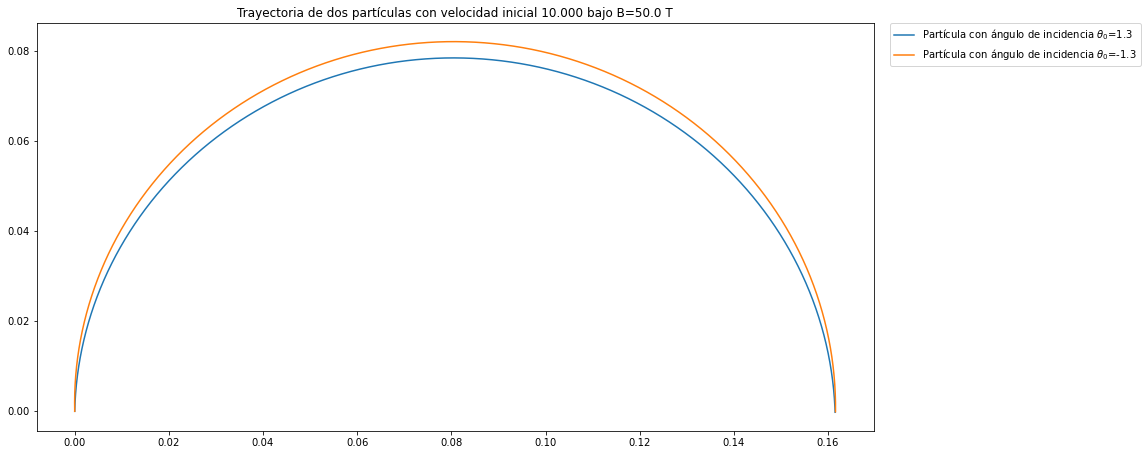

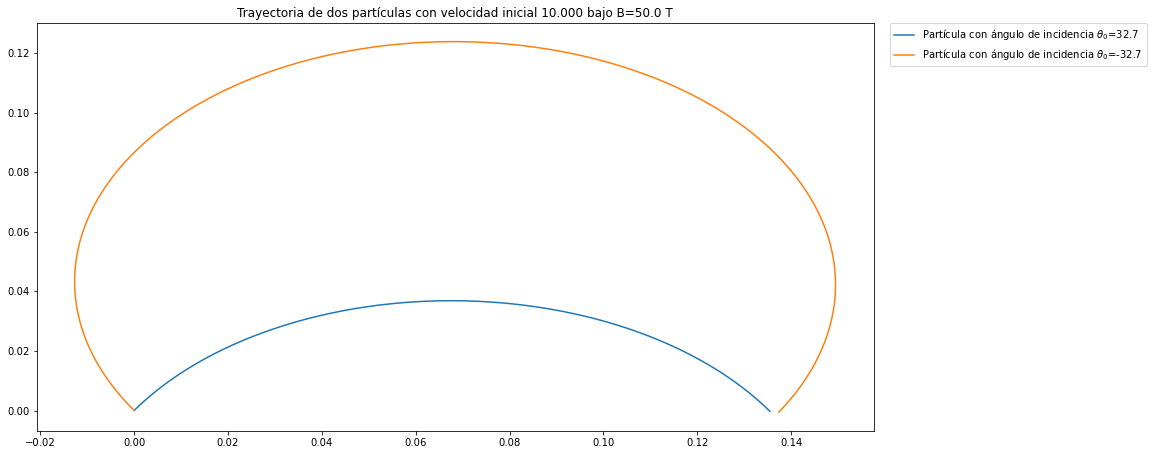

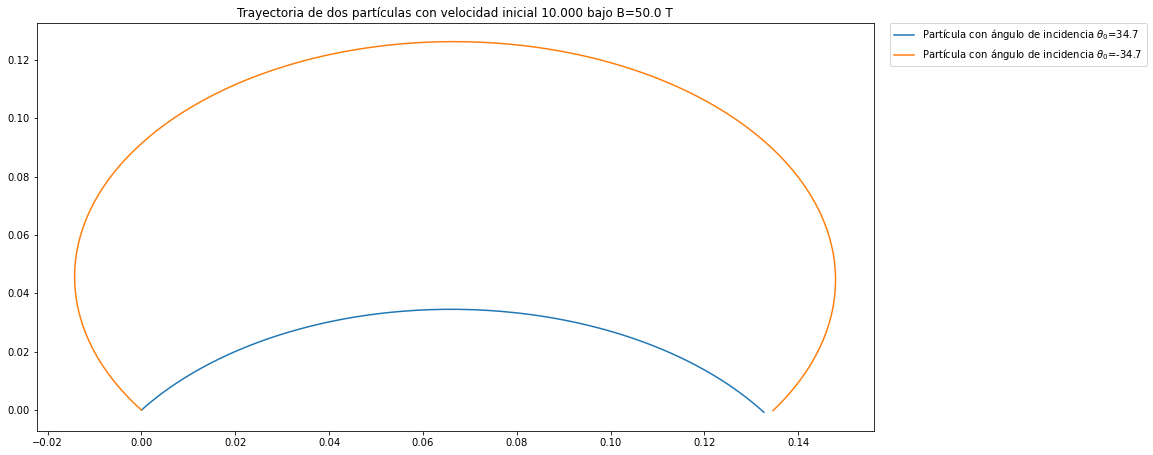

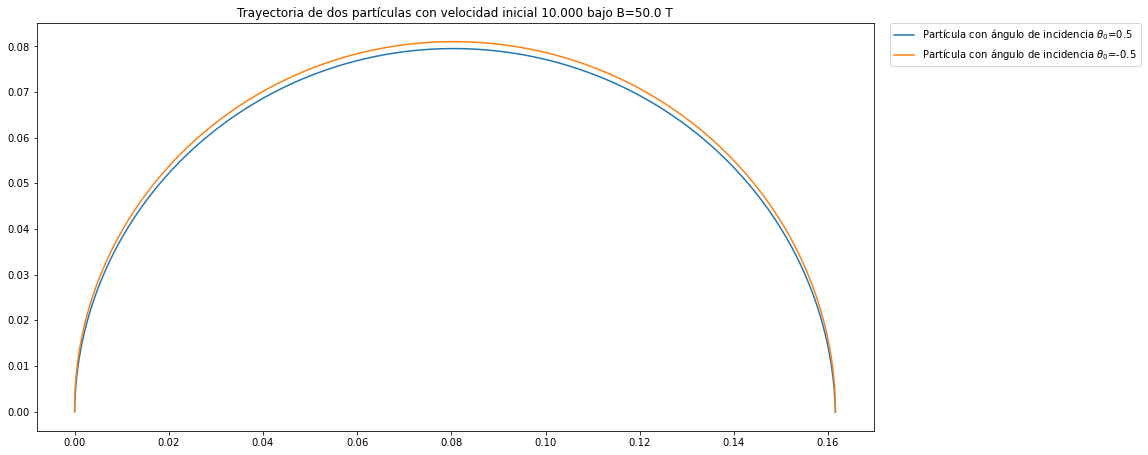

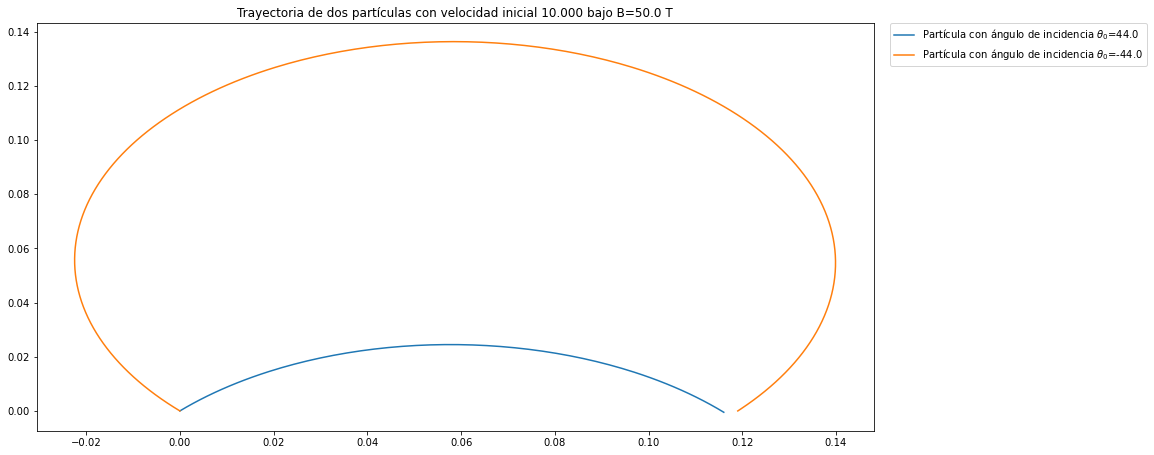

In [8]:
B = np.array([[0.0, 0.0, magnitud_B]])
posicion_inicial = np.array([[0.0, 0.0, 0.0]])
a_inicial = np.array([[0.0, 0.0, 0.0]])
t_inicial = 0
delta_t = 0.0001
e = 5
m_p = 2
for p in range(num_particulas):
    v_magnitud = max_vel
    theta_0 = theta0*np.random.rand()
    v_inicial = np.array([[v_magnitud*np.sin(np.deg2rad(theta_0)), v_magnitud*np.cos(np.deg2rad(theta_0)), 0.0]])
    v_inicial_m = np.array([[-v_magnitud*np.sin(np.deg2rad(theta_0)), v_magnitud*np.cos(np.deg2rad(theta_0)), 0.0]])
    trayectoria, velocidad, aceleracion = evolucionar_verlet(e, m_p, B, delta_t, posicion_inicial, v_inicial, a_inicial)
    trayectoria_m, velocidad_m, aceleracion_m = evolucionar_verlet(e, m_p, B, delta_t, posicion_inicial, v_inicial_m, a_inicial)
    plt.figure(figsize=(15,7.5))
    plt.plot(trayectoria[:,0], trayectoria[:,1], label=r'Partícula con ángulo de incidencia $\theta_0$={:.1f}'.format(theta_0))
    plt.plot(trayectoria_m[:,0], trayectoria_m[:,1], label=r'Partícula con ángulo de incidencia $\theta_0$={:.1f}'.format(-theta_0))
    plt.title('Trayectoria de dos partículas con velocidad inicial {:.3f} bajo B={:.1f} T'.format(v_magnitud, magnitud_B))
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)